In [1]:
# carga modelo y datos

import joblib
import pandas as pd

modelo_final = joblib.load("../models/lightgbm_tuneado.pkl")

df_transformed = pd.read_csv("../data/dataset_transformado.csv")
columnas = df_transformed.drop("loan_status", axis=1).columns 

c:\Users\USUARIO\anaconda3\envs\credit_xai_env\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Feature Importance

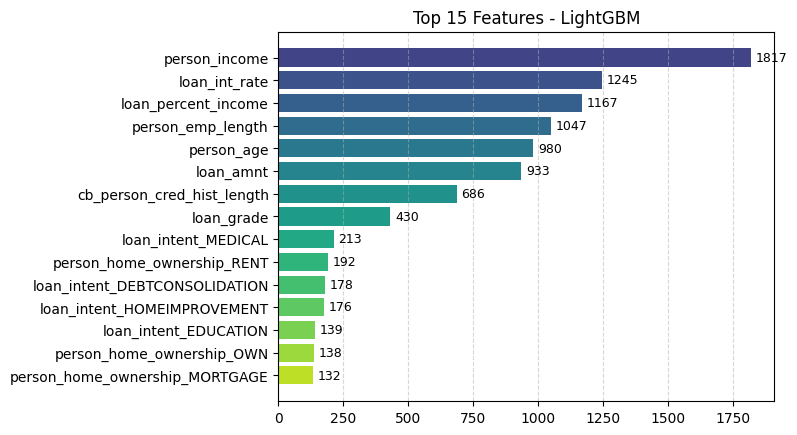

In [2]:
import matplotlib.pyplot as plt
import numpy as np

imp = modelo_final.feature_importances_
idx = np.argsort(imp)[::-1][:15]
feat, vals = np.array(columnas)[idx], imp[idx]

plt.barh(feat, vals, color=plt.cm.viridis(np.linspace(0.2, 0.9, 15)))
plt.gca().invert_yaxis()
for i, v in enumerate(vals):
    plt.text(v + 0.01 * max(vals), i, f"{v:.0f}", va="center", fontsize=9)
plt.title("Top 15 Features - LightGBM")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

El modelo LightGBM considera como más relevantes para evaluar el riesgo crediticio las siguientes variables:

- person_income: El nivel de ingresos es el factor más determinante, ya que refleja la capacidad de pago del cliente.
- loan_int_rate: La tasa de interés influye directamente en el costo del crédito y, por tanto, en la probabilidad de incumplimiento.
- loan_percent_income: El porcentaje del ingreso destinado al préstamo indica el nivel de endeudamiento del solicitante.
- person_emp_length: La duración del empleo aporta información sobre estabilidad laboral.
- person_age: La edad puede relacionarse con experiencia financiera y comportamiento crediticio.
- loan_amnt: El monto solicitado afecta el riesgo, ya que préstamos más altos implican mayor compromiso financiero.

# SHAP

c:\Users\USUARIO\anaconda3\envs\credit_xai_env\lib\site-packages\shap\explainers\_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


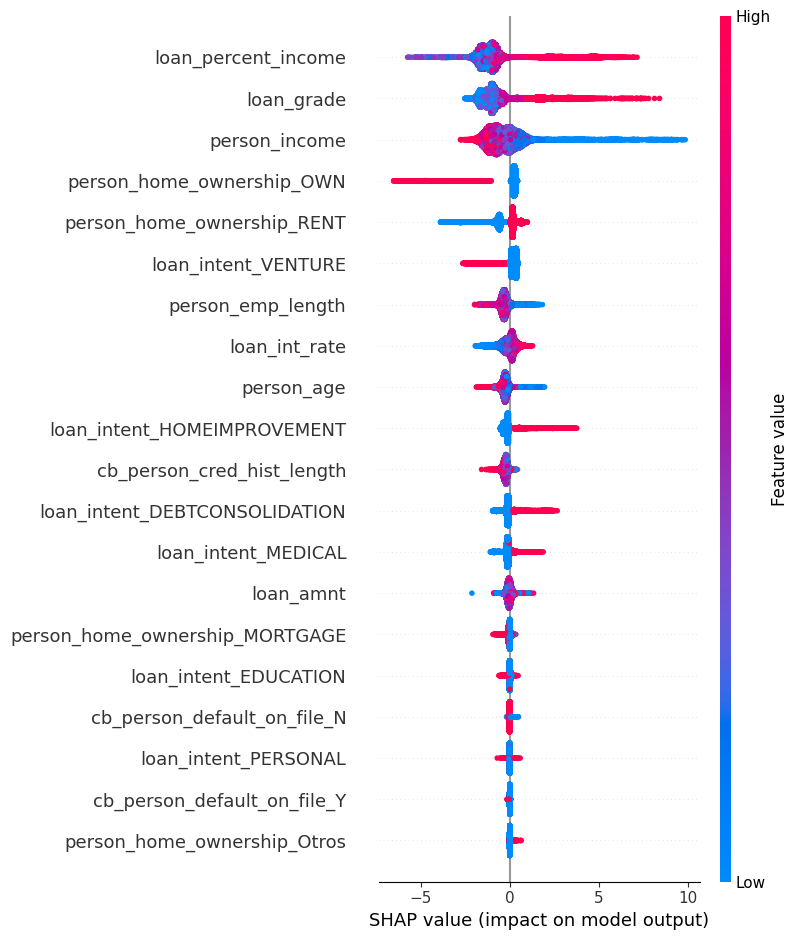

In [5]:
import shap
import matplotlib.pyplot as plt

X = df_transformed.drop("loan_status", axis=1)
explainer = shap.TreeExplainer(modelo_final)
shap_values = explainer.shap_values(X)

plt.figure(figsize=(8, 4)) 
shap.summary_plot(shap_values, X, show=False)
plt.show()

El gráfico SHAP muestra cómo cada variable influye en la predicción del riesgo crediticio, considerando tanto el impacto como la dirección (aumenta o disminuye el riesgo). Las seis variables más influyentes son:

- loan_percent_income: Un mayor porcentaje del ingreso destinado al préstamo (color rojo) incrementa el riesgo, mientras que valores bajos (azul) lo reducen.
- loan_grade: Calificaciones más bajas (rojo) tienden a aumentar la probabilidad de incumplimiento.
- person_income: Ingresos altos (rojo) reducen el riesgo, mientras que ingresos bajos (azul) lo incrementan.
- person_home_ownership_OWN: Tener vivienda propia (rojo) generalmente disminuye el riesgo.
- person_home_ownership_RENT: Alquilar (azul) se asocia con mayor riesgo en algunos casos.

# Conclusiones y recomendaciones

### Conclusiones
1. El modelo confirma que la **capacidad de pago** —especialmente el nivel de ingresos y el porcentaje del ingreso destinado al préstamo— es el principal factor asociado al riesgo crediticio.  
2. Las **condiciones del préstamo** (calificación, tasa de interés y monto solicitado) también influyen de manera importante en la probabilidad de incumplimiento, reflejando el efecto de las políticas crediticias sobre el riesgo.

---

### Recomendaciones
1. **Reforzar los criterios de evaluación crediticia**, priorizando la relación ingreso/deuda y la calificación del préstamo para reducir la exposición al riesgo.  
2. **Ajustar las políticas y productos** según el perfil de cliente, ofreciendo mejores condiciones a quienes muestran mayor capacidad de pago y un monitoreo más cercano a los segmentos de mayor riesgo.
